In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Reading The Data

In [95]:
df_1 = pd.read_csv(r'C:\Users\tabish\Downloads\Country-data.csv')

In [96]:
df_1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [97]:
df_1.shape
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [98]:
df_1.shape

(167, 10)

In [99]:
df_1.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


# Data Cleaning and Preparation

In [100]:
# Looking for null values
df_1.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

##### no null values in any columns

In [63]:
# Looking for duplicate columns and dropping them
df1.drop_duplicates()
df1.shape


(167, 10)

##### No duplicate columns in dataframe

In [101]:
# looing for unique values
df_1.nunique()

country       167
child_mort    139
exports       147
health        147
imports       151
income        156
inflation     156
life_expec    127
total_fer     138
gdpp          157
dtype: int64

In [102]:
# Converting exports health and imports to there absolute values
df_1['exports'] = (df_1['exports']/100 * df_1['gdpp'])
df_1['health'] = (df_1['health']/100 * df_1['gdpp'])
df_1['imports'] = (df_1['imports']/100 * df_1['gdpp'])
df_1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


### Outliers

In [103]:
# Looking for outliers 
df_1.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,17760.600000,3825.416000,15034.280000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,31385.100000,4966.701000,24241.560000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,64794.260000,8410.330400,55371.390000,84374.000000,41.478000,82.370000,6.563600,79088.000000


##### There are outlietrs present in certain columns and treat outliers after performing PCA. 

# Exploratory Data Analysis

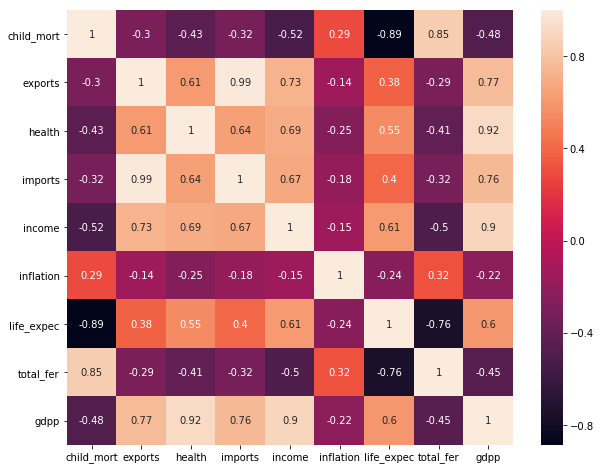

In [104]:
plt.figure(figsize = (10,8))# Size of the figure
sns.heatmap(df_1.corr(),annot = True)
plt.show()

##### Through Heatmap we can see there is a high correlation between child_mort and total_fer, child_mort and life_expec etc.

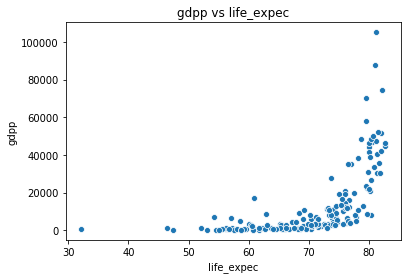

In [105]:
sns.scatterplot(data = df_1, x = 'life_expec', y = 'gdpp')
plt.title('gdpp vs life_expec')
plt.show()

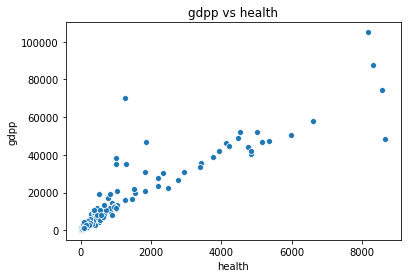

In [106]:
sns.scatterplot(data = df_1, x = 'health', y = 'gdpp')
plt.title('gdpp vs health')
plt.show()

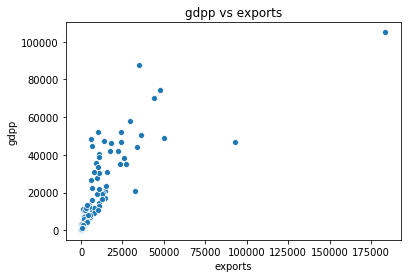

In [107]:
sns.scatterplot(data = df_1, x = 'exports', y = 'gdpp')
plt.title('gdpp vs exports')
plt.show()

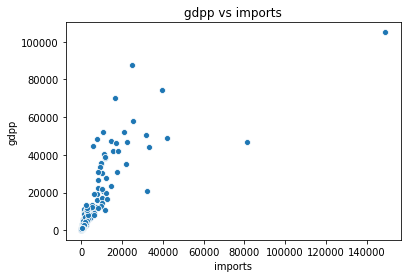

In [16]:
sns.scatterplot(data = df, x = 'imports', y = 'gdpp')
plt.title('gdpp vs imports')
plt.show()

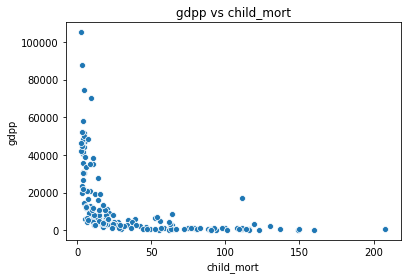

In [108]:
sns.scatterplot(data = df_1, x = 'child_mort', y = 'gdpp')
plt.title('gdpp vs child_mort')
plt.show()

# Model Building

## PCA

### Removing the country name from dataframe to perform PCA

In [109]:
df_1.head() 

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [110]:
df1 = df_1.iloc[:, 1:]
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [111]:
df1.shape

(167, 9)

### Scaling The Data 

In [75]:
scaler = StandardScaler()
X = df1.copy()
x = scaler.fit_transform(X)

G:\anaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
G:\anaconda\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [22]:
x[:5,:5]

array([[ 1.29153238, -0.4110113 , -0.56503989, -0.4322755 , -0.8082454 ],
       [-0.5389489 , -0.35019096, -0.43921769, -0.31367739, -0.3753689 ],
       [-0.27283273, -0.31852577, -0.48482608, -0.35372048, -0.22084447],
       [ 2.00780766, -0.29137452, -0.53236319, -0.34595254, -0.58504345],
       [-0.69563412, -0.10433146, -0.17877054,  0.04073499,  0.10173177]])

#### Applying PCA on the Data

In [23]:
?PCA

In [24]:
pca = PCA(random_state = 42)

In [25]:
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)

In [26]:
pca.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

In [27]:
pca.explained_variance_ratio_

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

<BarContainer object of 9 artists>

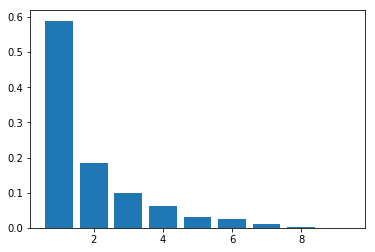

In [28]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

In [29]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
var_cumu

array([0.58937298, 0.77382467, 0.87293939, 0.93366217, 0.96395389,
       0.98855216, 0.9979496 , 0.99950602, 1.        ])

##### Making The Scree Plot

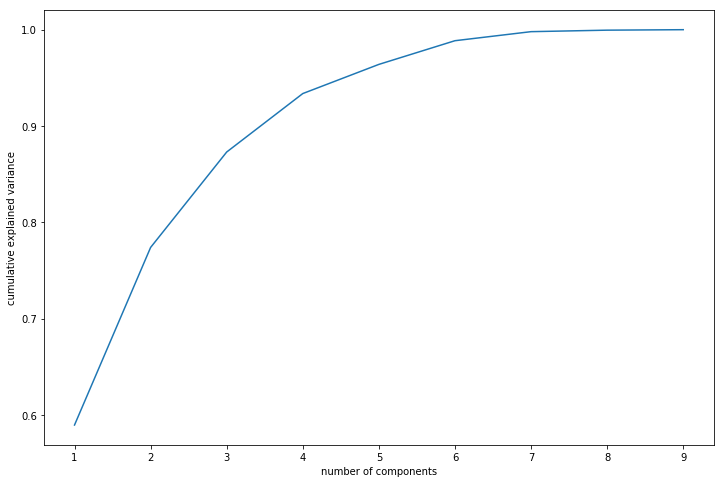

In [30]:
fig = plt.figure(figsize = (12,8))
plt.plot(range(1,len(var_cumu)+1), var_cumu)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

### 4 components are enough to describe around 92% of the variance in the dataset

In [31]:
# Since the dataset is not large e take components = 4
pca = PCA(n_components=4, random_state = 42)

In [32]:
newdata = pca.fit_transform(x)

In [147]:
newdata.shape

(167, 4)

##### Making a dataframe for our convinience

In [38]:
df_pca = pd.DataFrame(newdata, columns=["PC1", "PC2", "PC3", "PC4"])
df_pca.head()

,PC1,PC2,PC3,PC4
0,-2.635575,1.472267,-0.549489,-0.242326
1,-0.024206,-1.429892,-0.014123,0.450645
2,-0.459557,-0.675495,0.959355,0.218456
3,-2.722630,2.172332,0.600215,-0.433978
4,0.648597,-1.023437,-0.257430,0.289201


In [39]:
df_pca.head()

,PC1,PC2,PC3,PC4
0,-2.635575,1.472267,-0.549489,-0.242326
1,-0.024206,-1.429892,-0.014123,0.450645
2,-0.459557,-0.675495,0.959355,0.218456
3,-2.722630,2.172332,0.600215,-0.433978
4,0.648597,-1.023437,-0.257430,0.289201


In [42]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_pca.transpose())

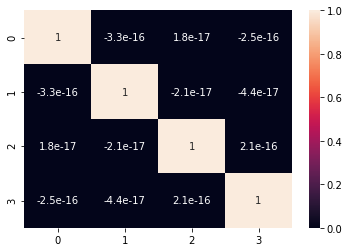

In [43]:
%matplotlib inline
sns.heatmap(corrmat,annot = True)
plt.show()

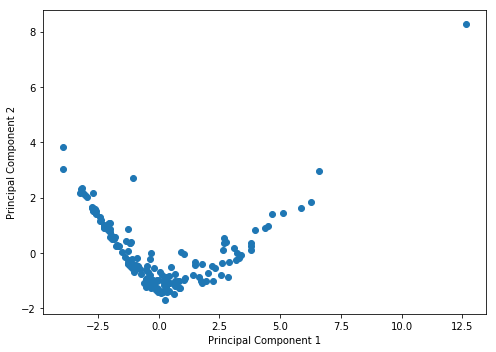

In [44]:
%matplotlib inline
fig = plt.figure(figsize = (7,5))
plt.scatter(df_pca.PC1, df_pca.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

### Outlier remove on the PCA dataset

In [45]:
df_pca.shape

(167, 4)

In [47]:
df_pca.describe()

,PC1,PC2,PC3,PC4
count,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02
mean,-2.659217e-17,-5.451394e-17,3.822624e-17,3.024859e-17
std,2.310046e+00,1.292310e+00,9.473152e-01,7.414831e-01
min,-3.937287e+00,-1.694220e+00,-1.756335e+00,-3.263264e+00
25%,-1.447294e+00,-9.750541e-01,-4.010482e-01,-2.345881e-01
50%,-3.574241e-01,-4.017902e-01,-1.744060e-01,1.287529e-01
75%,8.494139e-01,6.800428e-01,2.557727e-01,3.461697e-01
max,1.264807e+01,8.276683e+00,7.928939e+00,4.398488e+00


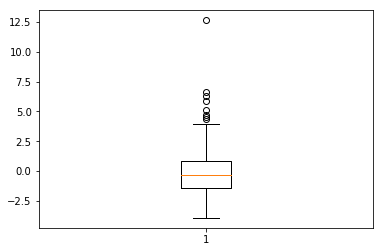

In [48]:
plt.boxplot(df_pca.PC1)
Q1 = df_pca.PC1.quantile(0.25)
Q3 = df_pca.PC1.quantile(0.75)
IQR = Q3 - Q1
df_pca2 = df_pca[(df_pca.PC1 >= Q1 - 1.5*IQR) & (df_pca.PC1 <= Q3 + 1.5*IQR)]

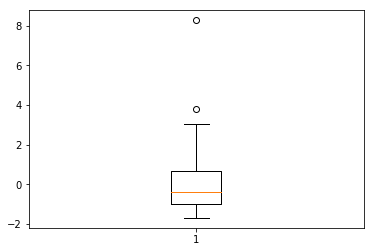

In [49]:
plt.boxplot(df_pca.PC2)
Q1 = df_pca.PC2.quantile(0.25)
Q3 = df_pca.PC2.quantile(0.75)
IQR = Q3 - Q1
df_pca2 = df_pca[(df_pca.PC2 >= Q1 - 1.5*IQR) & (df_pca.PC2 <= Q3 + 1.5*IQR)]

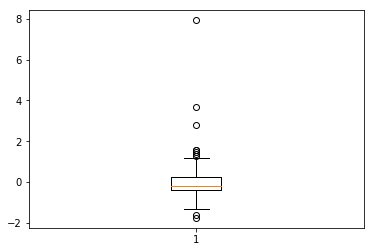

In [50]:
plt.boxplot(df_pca.PC3)
Q1 = df_pca.PC3.quantile(0.25)
Q3 = df_pca.PC3.quantile(0.75)
IQR = Q3 - Q1
df_pca2 = df_pca[(df_pca.PC3 >= Q1 - 1.5*IQR) & (df_pca.PC3 <= Q3 + 1.5*IQR)]

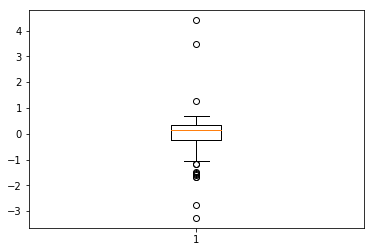

In [51]:
plt.boxplot(df_pca.PC4)
Q1 = df_pca.PC4.quantile(0.25)
Q3 = df_pca.PC4.quantile(0.75)
IQR = Q3 - Q1
df_pca2 = df_pca[(df_pca.PC4 >= Q1 - 1.5*IQR) & (df_pca.PC4 <= Q3 + 1.5*IQR)]

In [52]:
df_pca2.head()

,PC1,PC2,PC3,PC4
0,-2.635575,1.472267,-0.549489,-0.242326
1,-0.024206,-1.429892,-0.014123,0.450645
2,-0.459557,-0.675495,0.959355,0.218456
3,-2.722630,2.172332,0.600215,-0.433978
4,0.648597,-1.023437,-0.257430,0.289201


In [54]:
df_pca2.describe()

,PC1,PC2,PC3,PC4
count,154.000000,154.000000,154.000000,154.000000
mean,-0.399883,-0.093776,0.019045,0.057237
std,1.771894,1.116268,0.982766,0.373346
min,-3.937287,-1.694220,-1.756335,-1.059940
25%,-1.719397,-0.988867,-0.409320,-0.175583
50%,-0.478617,-0.478353,-0.170585,0.165937
75%,0.448431,0.583567,0.285394,0.346177
max,5.129461,3.821230,7.928939,0.675938


In [55]:
df_pca2.shape

(154, 4)

In [77]:
#Percentage of rows lost due to outlier removal
100 - (df_pca2.shape[0]/df1.shape[0] * 100)

7.784431137724539

In [76]:
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


# CLUSTERING:


## K-MEANS CLUSTERING

#### Checking the Hopkins Statistics on Dataset

In [79]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [80]:
hopkins(df_pca2)

0.9105935118342118

#### Since the Hopkins statistics score is more than 0.7, it can be interpreted that clustering can be performed on this dataset.

### Let's determine the optimal number of clusters using Silhouette Analysis and Sum of Squared Distance

In [81]:
from sklearn.metrics import silhouette_score

# Silhouette Analysis
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(df_pca2)
    sse_.append([k, silhouette_score(df_pca2, kmeans.labels_)])

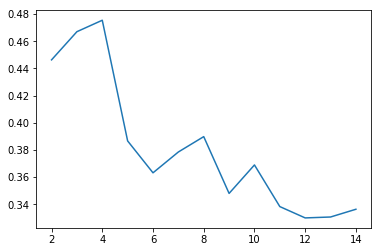

In [82]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])

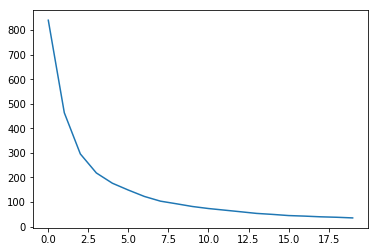

In [83]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(df_pca2)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

#### From the above silhoutte and elbow plot, let's first proceed with the number of clusters(k) as 4.

# K = 4

In [84]:
df_pca2.shape

(154, 4)

In [86]:
# Kmeans with K=4
model_clus4 = KMeans(n_clusters = 4, max_iter=50, random_state=100)
model_clus4.fit(df_pca2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=100, tol=0.0001, verbose=0)

In [87]:
model_clus4.labels_

array([2, 3, 3, 2, 3, 3, 3, 0, 3, 0, 0, 3, 3, 3, 0, 3, 2, 3, 3, 3, 2, 3,
       0, 3, 2, 2, 3, 2, 3, 2, 2, 3, 3, 3, 2, 2, 2, 3, 2, 3, 0, 0, 3, 3,
       3, 3, 2, 2, 3, 3, 0, 2, 2, 3, 2, 0, 3, 3, 2, 2, 3, 2, 3, 0, 3, 3,
       3, 3, 0, 0, 0, 3, 3, 3, 2, 2, 0, 3, 2, 3, 3, 2, 2, 3, 3, 3, 2, 2,
       3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 0, 0, 2, 1, 3, 2, 3, 3,
       3, 3, 3, 0, 0, 3, 3, 2, 3, 3, 2, 3, 3, 2, 0, 0, 2, 2, 0, 0, 3, 3,
       2, 3, 3, 2, 3, 2, 2, 3, 3, 3, 3, 2, 3, 0, 0, 3, 3, 3, 3, 3, 2, 2])

In [88]:
model_clus4.labels_.shape

(154,)

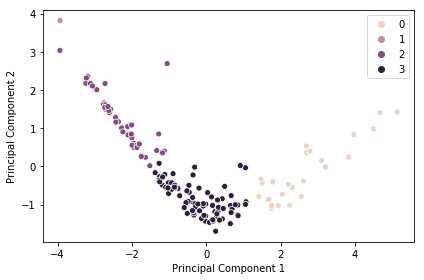

In [145]:
ax = sns.scatterplot(df_pca2['PC1'], df_pca2['PC2'], hue=model_clus4.labels_)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()


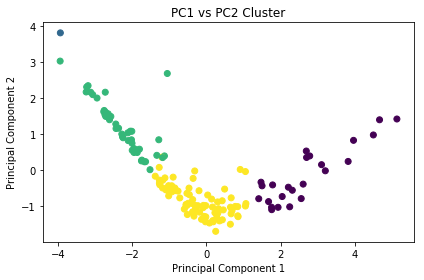

In [146]:
plt.scatter(df_pca2['PC1'], df_pca2['PC2'],c=model_clus4.labels_)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title("PC1 vs PC2 Cluster")
plt.tight_layout()
plt.show()

In [89]:
df_test = df_pca2.copy()
df_test.head(5)

,PC1,PC2,PC3,PC4
0,-2.635575,1.472267,-0.549489,-0.242326
1,-0.024206,-1.429892,-0.014123,0.450645
2,-0.459557,-0.675495,0.959355,0.218456
3,-2.722630,2.172332,0.600215,-0.433978
4,0.648597,-1.023437,-0.257430,0.289201


In [90]:
df_test = df_test.reset_index(drop=True)

In [91]:
df_test_cluster = pd.concat([df_test, pd.Series(model_clus4.labels_,dtype=int)],axis=1)
orig_col = df_test.columns.tolist()
orig_col.append('ClusterID')
df_test_cluster.columns = orig_col
df_test_cluster.head(10)

,PC1,PC2,PC3,PC4,ClusterID
0,-2.635575,1.472267,-0.549489,-0.242326,2
1,-0.024206,-1.429892,-0.014123,0.450645,3
2,-0.459557,-0.675495,0.959355,0.218456,3
3,-2.722630,2.172332,0.600215,-0.433978,2
4,0.648597,-1.023437,-0.257430,0.289201,3
5,0.035422,-0.685251,1.468697,-0.028838,3
6,-0.334555,-1.271889,0.190564,0.500247,3
7,3.816857,0.248363,-0.258960,-1.018163,0
8,-0.467995,-0.492682,0.609900,0.254612,3
9,1.498962,-0.429632,-0.544543,-0.250327,0


#### Merge the pca dataset with the original dataset for analysis

In [112]:
df_pca_country = pd.merge(df_1,df_pca2,left_index=True, right_index=True)
df_pca_country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,-2.635575,1.472267,-0.549489,-0.242326
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,-0.024206,-1.429892,-0.014123,0.450645
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,-0.459557,-0.675495,0.959355,0.218456
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,-2.722630,2.172332,0.600215,-0.433978
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0.648597,-1.023437,-0.257430,0.289201


In [113]:
df_pca_country.shape

(154, 14)

In [114]:
df_pca_country.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   8,   9,  10,
            ...
            156, 157, 158, 160, 161, 162, 163, 164, 165, 166],
           dtype='int64', length=154)

In [115]:
# resetting the index
df_pca_country = df_pca_country.reset_index(drop=True)
df_pca_country.index

RangeIndex(start=0, stop=154, step=1)

### Merge the clusterid obtained from PCA with the original dataset

In [116]:
df_pca_cluster_country = pd.concat([df_pca_country, pd.Series(model_clus4.labels_,dtype=int)],axis=1)
orig_col = df_pca_country.columns.tolist()
orig_col.append('ClusterID')
df_pca_cluster_country.columns = orig_col
df_pca_cluster_country.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.440,56.2,5.82,553,-2.635575,1.472267,-0.549489,-0.242326,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.490,76.3,1.65,4090,-0.024206,-1.429892,-0.014123,0.450645,3
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.100,76.5,2.89,4460,-0.459557,-0.675495,0.959355,0.218456,3
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.400,60.1,6.16,3530,-2.722630,2.172332,0.600215,-0.433978,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.440,76.8,2.13,12200,0.648597,-1.023437,-0.257430,0.289201,3
5,Argentina,14.5,1946.70,834.3000,1648.000,18700,20.900,75.8,2.37,10300,0.035422,-0.685251,1.468697,-0.028838,3
6,Armenia,18.1,669.76,141.6800,1458.660,6700,7.770,73.3,1.69,3220,-0.334555,-1.271889,0.190564,0.500247,3
7,Austria,4.3,24059.70,5159.0000,22418.200,43200,0.873,80.5,1.44,46900,3.816857,0.248363,-0.258960,-1.018163,0
8,Azerbaijan,39.2,3171.12,343.3920,1208.880,16000,13.800,69.1,1.92,5840,-0.467995,-0.492682,0.609900,0.254612,3
9,Bahamas,13.8,9800.00,2209.2000,12236.000,22900,-0.393,73.8,1.86,28000,1.498962,-0.429632,-0.544543,-0.250327,0


In [117]:
df_pca_cluster_country.shape

(154, 15)

In [118]:

# Check for number of countries under each cluster
df_pca_cluster_country.groupby('ClusterID')['country'].count()

ClusterID
0    24
1     1
2    46
3    83
Name: country, dtype: int64

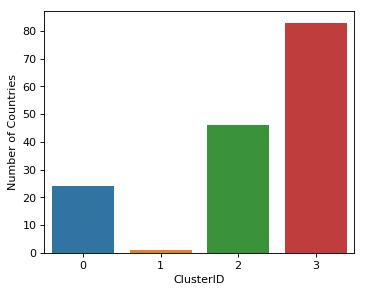

In [144]:
plt.figure(figsize=(5,4),dpi=80)
ax = sns.countplot(data=df_pca_cluster_country,x='ClusterID')

ax.set_ylabel("Number of Countries")
plt.show()

In [120]:
km_clusters_childmort = pd.DataFrame(df_pca_cluster_country.groupby(["ClusterID"]).child_mort.mean())
km_clusters_exports = pd.DataFrame(df_pca_cluster_country.groupby(["ClusterID"]).exports.mean())
km_clusters_health = pd.DataFrame(df_pca_cluster_country.groupby(["ClusterID"]).health.mean())
km_clusters_imports = pd.DataFrame(df_pca_cluster_country.groupby(["ClusterID"]).imports.mean())
km_clusters_income = pd.DataFrame(df_pca_cluster_country.groupby(["ClusterID"]).income.mean())
km_clusters_inflation = pd.DataFrame(df_pca_cluster_country.groupby(["ClusterID"]).inflation.mean())
km_clusters_life_expec = pd.DataFrame(df_pca_cluster_country.groupby(["ClusterID"]).life_expec.mean())
km_clusters_total_fer = pd.DataFrame(df_pca_cluster_country.groupby(["ClusterID"]).total_fer.mean())
km_clusters_gdpp = pd.DataFrame(df_pca_cluster_country.groupby(["ClusterID"]).gdpp.mean())

In [121]:
df = pd.concat([pd.Series([0,1,2,3]), km_clusters_childmort, km_clusters_exports, km_clusters_health,km_clusters_imports,\
               km_clusters_income,km_clusters_inflation,km_clusters_life_expec,km_clusters_total_fer,km_clusters_gdpp], axis=1)
df.columns = ["ClusterID", "child_mort_mean", "exports_mean", "health_mean","imports_mean",\
             "income_mean","inflation_mean","life_expec_mean","total_fer_mean","gdpp_mean"]
df

,ClusterID,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,5.720833,19076.450000,2746.553750,15941.891667,42737.500000,3.030500,79.316667,1.800000,34916.666667
1,1,130.000000,589.490000,118.131000,405.420000,5150.000000,104.000000,60.500000,5.840000,2330.000000
2,2,91.965217,865.925196,109.018776,820.814370,3678.760870,9.807283,59.039130,4.983043,1843.739130
3,3,22.131325,2776.919259,392.886270,2884.027965,12309.518072,7.815169,72.868675,2.316747,6265.927711


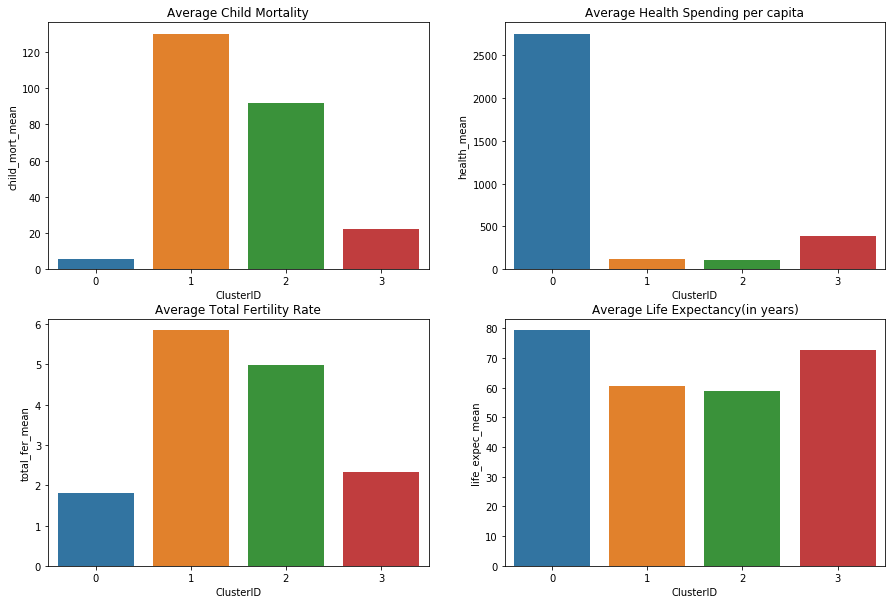

In [124]:
# Let's plot the social factors based on cluster-ids
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
ax = sns.barplot(x=df.ClusterID, y=df.child_mort_mean)
ax.set_title('Average Child Mortality')


plt.subplot(2, 2, 2)
ax = sns.barplot(x=df.ClusterID, y=df.health_mean)
ax.set_title('Average Health Spending per capita')


plt.subplot(2, 2, 3)
ax = sns.barplot(x=df.ClusterID, y=df.total_fer_mean)
ax.set_title('Average Total Fertility Rate')


plt.subplot(2, 2, 4)
ax = sns.barplot(x=df.ClusterID, y=df.life_expec_mean)
ax.set_title('Average Life Expectancy(in years)')

plt.show()

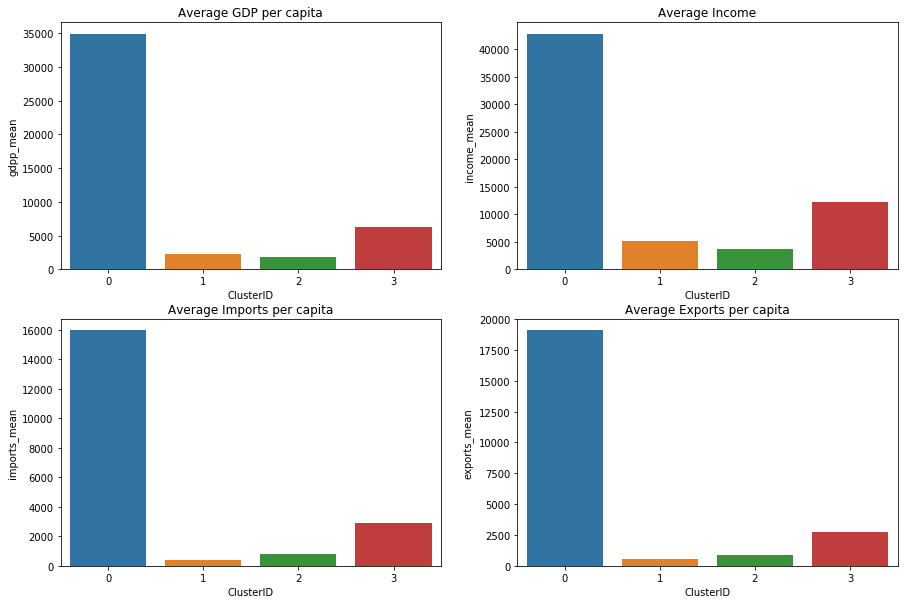

In [125]:
# Let's plot the economic factors based on cluster-ids
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
ax = sns.barplot(x=df.ClusterID, y=df.gdpp_mean)
ax.set_title('Average GDP per capita')


plt.subplot(2, 2, 2)
ax = sns.barplot(x=df.ClusterID, y=df.income_mean)
ax.set_title('Average Income')


plt.subplot(2, 2, 3)
ax = sns.barplot(x=df.ClusterID, y=df.imports_mean)
ax.set_title('Average Imports per capita')


plt.subplot(2, 2, 4)
ax = sns.barplot(x=df.ClusterID, y=df.exports_mean)
ax.set_title('Average Exports per capita')

plt.show()


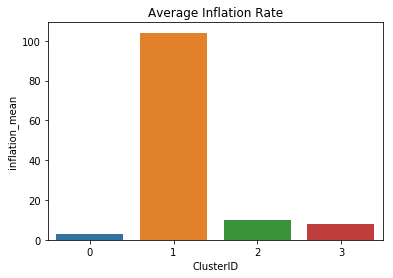

In [126]:
ax = sns.barplot(x=df.ClusterID, y=df.inflation_mean)
ax.set_title('Average Inflation Rate')

plt.show()


### Cluster fitting the criteria of funding :

##### From the above plots following observations can be made :

##### Clusters 1 and 3 are the most affected clusters in terms of mean gdpp and income. Also the child mortality rate and inflation rate is considerably high. Total health spending is also less for those clusters.

##### Total fertility rate is quite high for clusters 1 and 3 which means that the rate of population increase is high for the countries falling under those clusters.Combining this with the low income and gdpp means these clusters are in dire need of support and aid.

##### Cluster 0 is the most well performing cluster with high gdpp,income, health spendings, life-expectancy and low child mortality and inflation rate.

##### Cluster 2 has also average gdpp and income. They might not be the most developed countries but they don't need immediate attention for aid.

### It can be clearly seen from the analysis that the countries falling under Cluster-1 and Cluster-3, especially countries that fall under Cluster-3 are the worstly affected countries and are in dire need of aid and support

In [127]:
# Countries falling under cluster-3
pd.DataFrame(df_pca_cluster_country[df_pca_cluster_country.ClusterID==3]['country'])

,country
1,Albania
2,Algeria
4,Antigua and Barbuda
5,Argentina
6,Armenia
8,Azerbaijan
11,Bangladesh
12,Barbados
13,Belarus
15,Belize


In [128]:
# Countries falling under cluster-1
pd.DataFrame(df_pca_cluster_country[df_pca_cluster_country.ClusterID==1]['country']).head(10)

,country
105,Nigeria


#### These countries are mostly 3rd world countries with high poverty rate.


### NGO Help should come forward and provide funding to these countries.

In [129]:
# Check for countries falling under cluster-0
pd.DataFrame(df_pca_cluster_country[df_pca_cluster_country.ClusterID==0]['country']).head(10)

,country
7,Austria
9,Bahamas
10,Bahrain
14,Belgium
22,Brunei
40,Cyprus
41,Czech Republic
50,Finland
55,Greece
63,Iceland


### These countries have high gdpp and income as well as low child mortality. These are developed countries and doesn't needs any attention from NGO.

# K = 5

#### Let's repeat the process again ith 5 clusters

In [148]:
# Kmeans with K=5
model_clus5 = KMeans(n_clusters = 5, max_iter=50,random_state=100)
model_clus5.fit(df_pca2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=100, tol=0.0001, verbose=0)

In [149]:
model_clus5.labels_

array([2, 0, 0, 2, 0, 0, 0, 1, 0, 1, 1, 3, 0, 0, 1, 0, 2, 0, 3, 0, 3, 0,
       1, 0, 2, 2, 3, 2, 0, 2, 2, 0, 0, 0, 3, 2, 3, 0, 2, 0, 1, 1, 0, 0,
       3, 0, 2, 3, 0, 3, 1, 3, 2, 0, 3, 1, 0, 3, 2, 2, 3, 2, 0, 1, 3, 3,
       0, 3, 1, 1, 1, 0, 0, 0, 3, 3, 1, 3, 3, 0, 0, 2, 2, 0, 0, 0, 3, 2,
       0, 0, 2, 3, 0, 3, 0, 3, 0, 0, 2, 3, 3, 3, 1, 1, 2, 4, 0, 3, 0, 0,
       0, 3, 0, 1, 1, 0, 0, 3, 3, 0, 3, 0, 0, 2, 0, 1, 3, 3, 1, 1, 0, 0,
       3, 0, 3, 2, 0, 3, 2, 3, 0, 0, 3, 2, 0, 1, 1, 0, 3, 3, 0, 0, 3, 2])

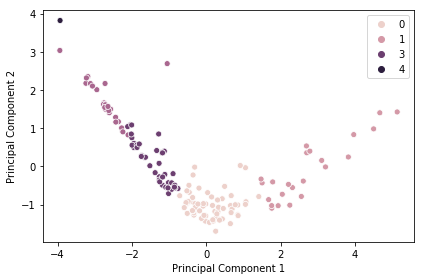

In [150]:
ax = sns.scatterplot(df_pca2['PC1'], df_pca2['PC2'], hue=model_clus5.labels_)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()

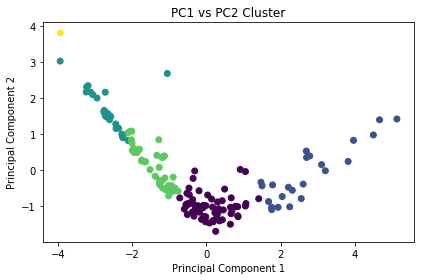

In [151]:
plt.scatter(df_pca2['PC1'], df_pca2['PC2'],c=model_clus5.labels_)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title("PC1 vs PC2 Cluster")
plt.tight_layout()

### Merge the pca dataset with the original dataset

In [153]:
df_pca_country_1 = pd.merge(df_1,df_pca2,left_index=True, right_index=True)
df_pca_country_1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,-2.635575,1.472267,-0.549489,-0.242326
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,-0.024206,-1.429892,-0.014123,0.450645
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,-0.459557,-0.675495,0.959355,0.218456
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,-2.722630,2.172332,0.600215,-0.433978
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0.648597,-1.023437,-0.257430,0.289201


In [154]:
df_pca_country_1.shape

(154, 14)

In [155]:
df_pca_country_1 = df_pca_country.reset_index(drop=True)
df_pca_country_1.index

RangeIndex(start=0, stop=154, step=1)

 #### Merge the clusterid with the original dataset

In [156]:
df_pca_cluster_country_1 = pd.concat([df_pca_country_1, pd.Series(model_clus5.labels_,dtype=int)],axis=1)
orig_col = df_pca_country_1.columns.tolist()
orig_col.append('ClusterID')
df_pca_cluster_country_1.columns = orig_col
df_pca_cluster_country_1.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.440,56.2,5.82,553,-2.635575,1.472267,-0.549489,-0.242326,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.490,76.3,1.65,4090,-0.024206,-1.429892,-0.014123,0.450645,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.100,76.5,2.89,4460,-0.459557,-0.675495,0.959355,0.218456,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.400,60.1,6.16,3530,-2.722630,2.172332,0.600215,-0.433978,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.440,76.8,2.13,12200,0.648597,-1.023437,-0.257430,0.289201,0
5,Argentina,14.5,1946.70,834.3000,1648.000,18700,20.900,75.8,2.37,10300,0.035422,-0.685251,1.468697,-0.028838,0
6,Armenia,18.1,669.76,141.6800,1458.660,6700,7.770,73.3,1.69,3220,-0.334555,-1.271889,0.190564,0.500247,0
7,Austria,4.3,24059.70,5159.0000,22418.200,43200,0.873,80.5,1.44,46900,3.816857,0.248363,-0.258960,-1.018163,1
8,Azerbaijan,39.2,3171.12,343.3920,1208.880,16000,13.800,69.1,1.92,5840,-0.467995,-0.492682,0.609900,0.254612,0
9,Bahamas,13.8,9800.00,2209.2000,12236.000,22900,-0.393,73.8,1.86,28000,1.498962,-0.429632,-0.544543,-0.250327,1


In [157]:
# Check for number of countries under each cluster
df_pca_cluster_country_1.groupby('ClusterID')['country'].count()

ClusterID
0    62
1    23
2    26
3    42
4     1
Name: country, dtype: int64

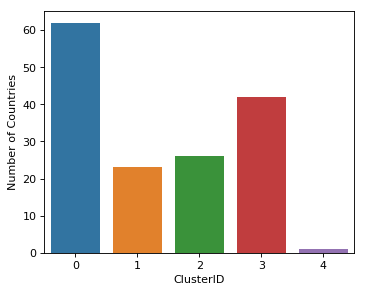

In [158]:
plt.figure(figsize=(5,4),dpi=80)
ax = sns.countplot(data=df_pca_cluster_country_1,x='ClusterID')

ax.set_ylabel("Number of Countries")
plt.show()


In [159]:
km_clusters_childmort = pd.DataFrame(df_pca_cluster_country_1.groupby(["ClusterID"]).child_mort.mean())
km_clusters_exports = pd.DataFrame(df_pca_cluster_country_1.groupby(["ClusterID"]).exports.mean())
km_clusters_health = pd.DataFrame(df_pca_cluster_country_1.groupby(["ClusterID"]).health.mean())
km_clusters_imports = pd.DataFrame(df_pca_cluster_country_1.groupby(["ClusterID"]).imports.mean())
km_clusters_income = pd.DataFrame(df_pca_cluster_country_1.groupby(["ClusterID"]).income.mean())
km_clusters_inflation = pd.DataFrame(df_pca_cluster_country_1.groupby(["ClusterID"]).inflation.mean())
km_clusters_life_expec = pd.DataFrame(df_pca_cluster_country_1.groupby(["ClusterID"]).life_expec.mean())
km_clusters_total_fer = pd.DataFrame(df_pca_cluster_country_1.groupby(["ClusterID"]).total_fer.mean())
km_clusters_gdpp = pd.DataFrame(df_pca_cluster_country_1.groupby(["ClusterID"]).gdpp.mean())

In [160]:
df = pd.concat([pd.Series([0,1,2,3,4]), km_clusters_childmort, km_clusters_exports, km_clusters_health,km_clusters_imports,\
               km_clusters_income,km_clusters_inflation,km_clusters_life_expec,km_clusters_total_fer,km_clusters_gdpp], axis=1)
df.columns = ["ClusterID", "child_mort_mean", "exports_mean", "health_mean","imports_mean",\
             "income_mean","inflation_mean","life_expec_mean","total_fer_mean","gdpp_mean"]
df

,ClusterID,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,16.017742,3614.004516,503.302468,3678.242097,14942.741935,7.182806,74.591935,2.031774,7829.677419
1,1,5.665217,19355.173913,2802.528261,16073.504348,43500.000000,3.141174,79.482609,1.816087,35713.043478
2,2,112.034615,815.919508,73.969462,714.407308,2953.576923,8.867885,55.996154,5.504231,1401.846154
3,3,51.626190,897.630246,141.800121,1033.832907,5068.333333,10.104286,65.685714,3.663333,2371.333333
4,4,130.000000,589.490000,118.131000,405.420000,5150.000000,104.000000,60.500000,5.840000,2330.000000


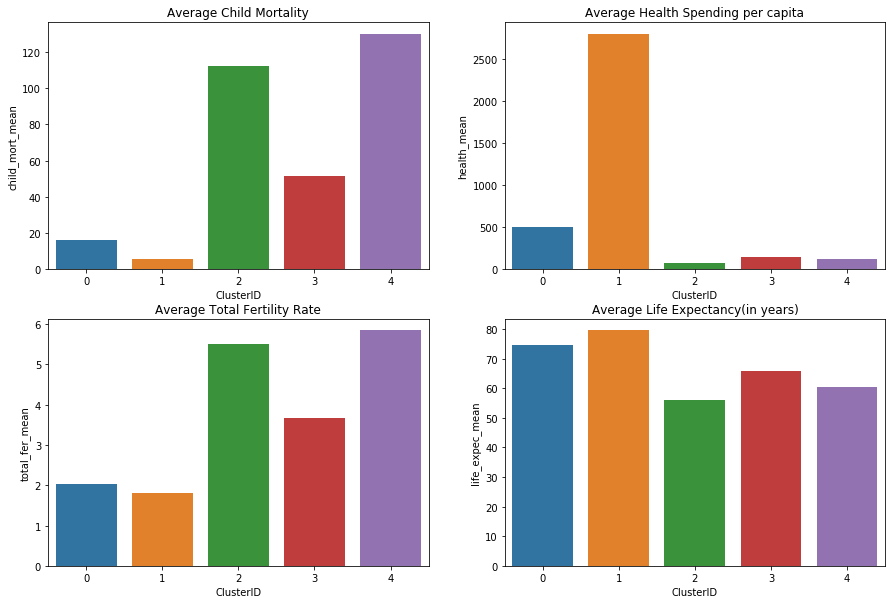

In [161]:
# Let's plot the social factors based on cluster-ids
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
ax = sns.barplot(x=df.ClusterID, y=df.child_mort_mean)
ax.set_title('Average Child Mortality')


plt.subplot(2, 2, 2)
ax = sns.barplot(x=df.ClusterID, y=df.health_mean)
ax.set_title('Average Health Spending per capita')


plt.subplot(2, 2, 3)
ax = sns.barplot(x=df.ClusterID, y=df.total_fer_mean)
ax.set_title('Average Total Fertility Rate')


plt.subplot(2, 2, 4)
ax = sns.barplot(x=df.ClusterID, y=df.life_expec_mean)
ax.set_title('Average Life Expectancy(in years)')


plt.show()

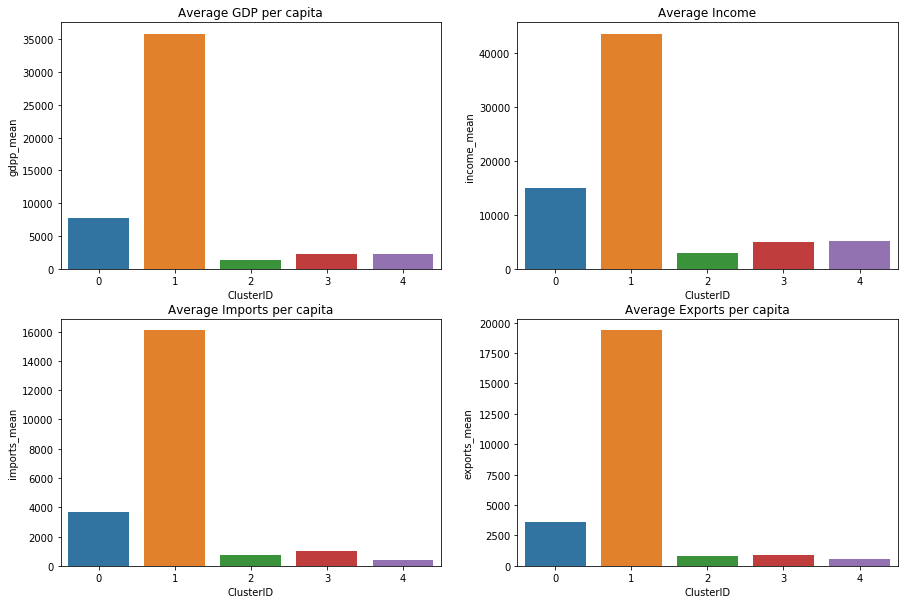

In [162]:
# Let's plot the economic factors based on cluster-ids
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
ax = sns.barplot(x=df.ClusterID, y=df.gdpp_mean)
ax.set_title('Average GDP per capita')


plt.subplot(2, 2, 2)
ax = sns.barplot(x=df.ClusterID, y=df.income_mean)
ax.set_title('Average Income')


plt.subplot(2, 2, 3)
ax = sns.barplot(x=df.ClusterID, y=df.imports_mean)
ax.set_title('Average Imports per capita')


plt.subplot(2, 2, 4)
ax = sns.barplot(x=df.ClusterID, y=df.exports_mean)
ax.set_title('Average Exports per capita')


plt.show()

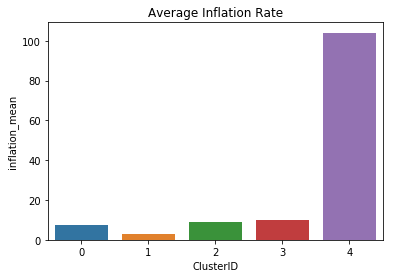

In [164]:
ax = sns.barplot(x=df.ClusterID, y=df.inflation_mean)
ax.set_title('Average Inflation Rate')

plt.show()

#### From the above plots it can be observed that the countries falling under cluster-1 and 4 are the mostly affected countries. Let's take a look at those countries :

In [165]:
# Countries falling under cluster-1
pd.DataFrame(df_pca_cluster_country_1[df_pca_cluster_country_1.ClusterID==1]['country']).head(10)

,country
7,Austria
9,Bahamas
10,Bahrain
14,Belgium
22,Brunei
40,Cyprus
41,Czech Republic
50,Finland
55,Greece
63,Iceland


In [166]:
# Countries falling under cluster-4
pd.DataFrame(df_pca_cluster_country_1[df_pca_cluster_country_1.ClusterID==4]['country']).head(10)

,country
105,Nigeria


## So it can be observed that the countries falling under cluster-1 are similar to our observation we had during earlier clustering when we had 4 clusters.

# Hierarchical Clustering:

In [130]:
# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

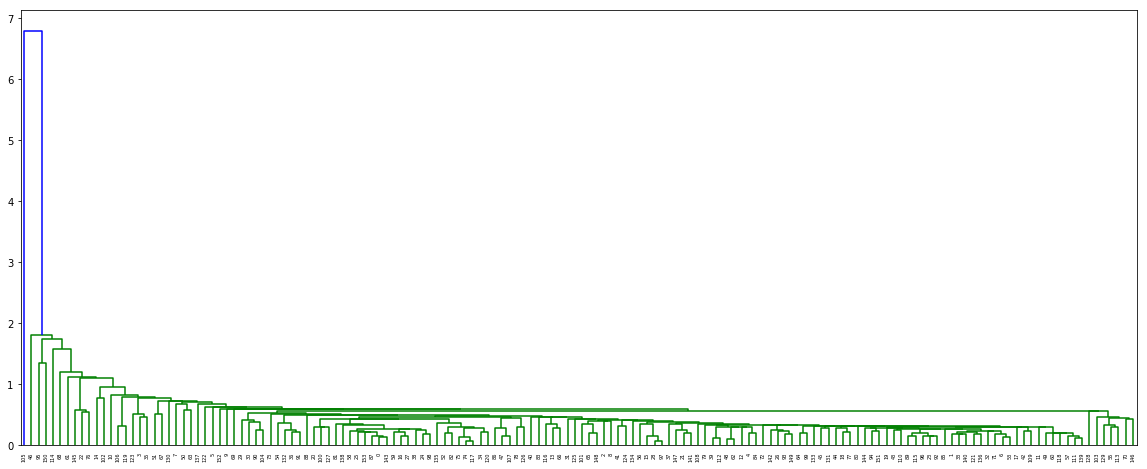

In [131]:
# heirarchical clustering
plt.figure(figsize=(20,8))
mergings = linkage(df_pca2, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

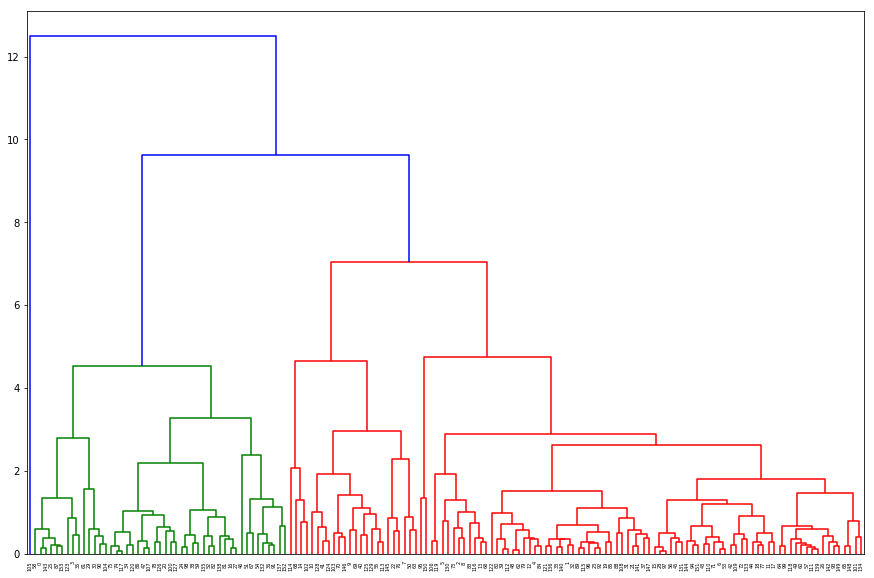

In [132]:
plt.figure(figsize=(15,10))
mergings = linkage(df_pca2, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [133]:
# Cut the dendogram at the point to create 4 clusters
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 4).reshape(-1,))

In [134]:
df_pca_cluster_country_hier = pd.concat([df_pca_country, clusterCut],axis=1)
orig_col = df_pca_country.columns.tolist()
orig_col.append('ClusterID')
df_pca_cluster_country_hier.columns = orig_col
df_pca_cluster_country_hier.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.440,56.2,5.82,553,-2.635575,1.472267,-0.549489,-0.242326,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.490,76.3,1.65,4090,-0.024206,-1.429892,-0.014123,0.450645,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.100,76.5,2.89,4460,-0.459557,-0.675495,0.959355,0.218456,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.400,60.1,6.16,3530,-2.722630,2.172332,0.600215,-0.433978,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.440,76.8,2.13,12200,0.648597,-1.023437,-0.257430,0.289201,1
5,Argentina,14.5,1946.70,834.3000,1648.000,18700,20.900,75.8,2.37,10300,0.035422,-0.685251,1.468697,-0.028838,1
6,Armenia,18.1,669.76,141.6800,1458.660,6700,7.770,73.3,1.69,3220,-0.334555,-1.271889,0.190564,0.500247,1
7,Austria,4.3,24059.70,5159.0000,22418.200,43200,0.873,80.5,1.44,46900,3.816857,0.248363,-0.258960,-1.018163,2
8,Azerbaijan,39.2,3171.12,343.3920,1208.880,16000,13.800,69.1,1.92,5840,-0.467995,-0.492682,0.609900,0.254612,1
9,Bahamas,13.8,9800.00,2209.2000,12236.000,22900,-0.393,73.8,1.86,28000,1.498962,-0.429632,-0.544543,-0.250327,2


In [135]:
df_pca_cluster_country_hier.ClusterID.value_counts()

1    82
0    47
2    24
3     1
Name: ClusterID, dtype: int64

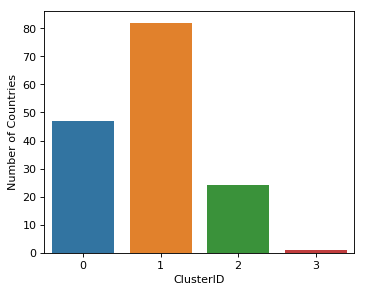

In [137]:
plt.figure(figsize=(5,4),dpi=80)
ax = sns.countplot(data=df_pca_cluster_country_hier,x='ClusterID')

ax.set_ylabel("Number of Countries")
plt.show()


In [138]:
hier_clusters_childmort = pd.DataFrame(df_pca_cluster_country_hier.groupby(["ClusterID"]).child_mort.mean())
hier_clusters_exports = pd.DataFrame(df_pca_cluster_country_hier.groupby(["ClusterID"]).exports.mean())
hier_clusters_health = pd.DataFrame(df_pca_cluster_country_hier.groupby(["ClusterID"]).health.mean())
hier_clusters_imports = pd.DataFrame(df_pca_cluster_country_hier.groupby(["ClusterID"]).imports.mean())
hier_clusters_income = pd.DataFrame(df_pca_cluster_country_hier.groupby(["ClusterID"]).income.mean())
hier_clusters_inflation = pd.DataFrame(df_pca_cluster_country_hier.groupby(["ClusterID"]).inflation.mean())
hier_clusters_life_expec = pd.DataFrame(df_pca_cluster_country_hier.groupby(["ClusterID"]).life_expec.mean())
hier_clusters_total_fer = pd.DataFrame(df_pca_cluster_country_hier.groupby(["ClusterID"]).total_fer.mean())
hier_clusters_gdpp = pd.DataFrame(df_pca_cluster_country_hier.groupby(["ClusterID"]).gdpp.mean())

In [139]:
df_hier = pd.concat([pd.Series([0,1,2,3]), hier_clusters_childmort, hier_clusters_exports, hier_clusters_health,hier_clusters_imports,\
               hier_clusters_income,hier_clusters_inflation,hier_clusters_life_expec,hier_clusters_total_fer,hier_clusters_gdpp], axis=1)
df_hier.columns = ["ClusterID", "child_mort_mean", "exports_mean", "health_mean","imports_mean",\
             "income_mean","inflation_mean","life_expec_mean","total_fer_mean","gdpp_mean"]
df_hier

,ClusterID,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,90.793617,885.224660,114.751355,835.999170,3870.702128,9.951809,59.212766,4.974043,1900.255319
1,1,21.951220,2789.162177,393.062322,2900.485623,12304.756098,7.708037,72.937805,2.289390,6287.463415
2,2,5.720833,19076.450000,2746.553750,15941.891667,42737.500000,3.030500,79.316667,1.800000,34916.666667
3,3,130.000000,589.490000,118.131000,405.420000,5150.000000,104.000000,60.500000,5.840000,2330.000000


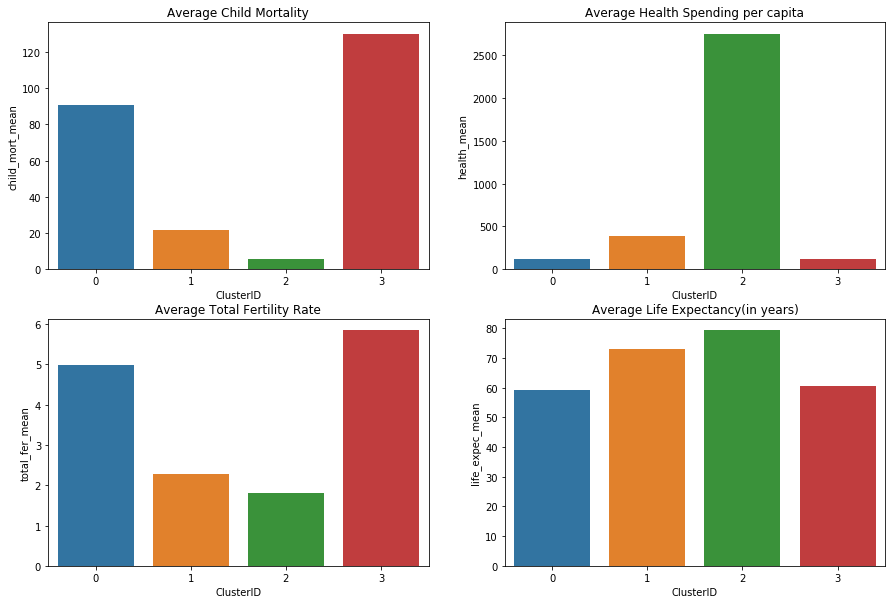

In [140]:
# plottin the social factors based on cluster-ids
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
ax = sns.barplot(x=df_hier.ClusterID, y=df_hier.child_mort_mean)
ax.set_title('Average Child Mortality')


plt.subplot(2, 2, 2)
ax = sns.barplot(x=df_hier.ClusterID, y=df_hier.health_mean)
ax.set_title('Average Health Spending per capita')


plt.subplot(2, 2, 3)
ax = sns.barplot(x=df_hier.ClusterID, y=df_hier.total_fer_mean)
ax.set_title('Average Total Fertility Rate')


plt.subplot(2, 2, 4)
ax = sns.barplot(x=df_hier.ClusterID, y=df_hier.life_expec_mean)
ax.set_title('Average Life Expectancy(in years)')

plt.show()

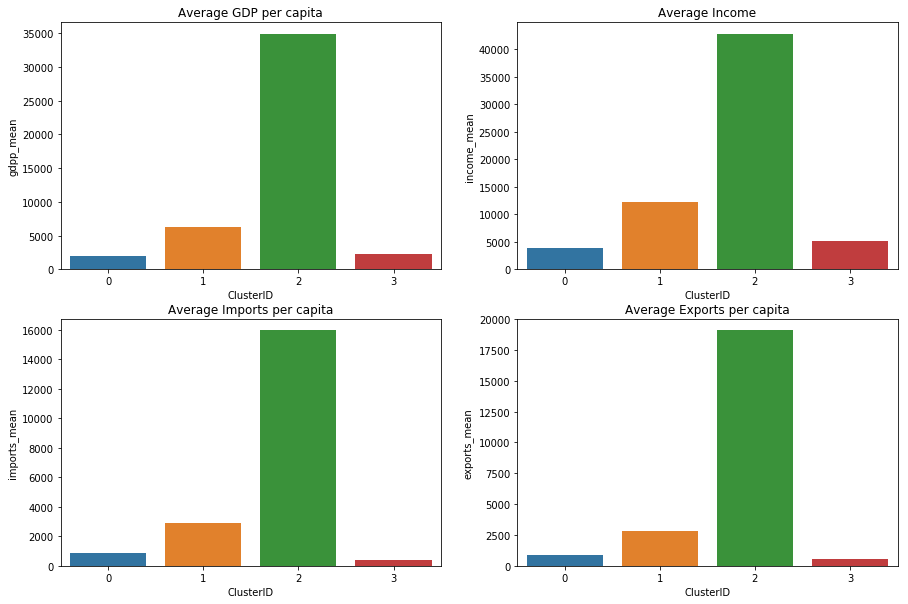

In [141]:
# Let's plot the economic factors based on cluster-ids
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
ax = sns.barplot(x=df_hier.ClusterID, y=df_hier.gdpp_mean)
ax.set_title('Average GDP per capita')


plt.subplot(2, 2, 2)
ax = sns.barplot(x=df_hier.ClusterID, y=df_hier.income_mean)
ax.set_title('Average Income')


plt.subplot(2, 2, 3)
ax = sns.barplot(x=df_hier.ClusterID, y=df_hier.imports_mean)
ax.set_title('Average Imports per capita')


plt.subplot(2, 2, 4)
ax = sns.barplot(x=df_hier.ClusterID, y=df_hier.exports_mean)
ax.set_title('Average Exports per capita')

plt.show()


#### From the clusters obtained by hierarchial clustering, it can be observed that clusters 0 and 1 are having high child mortality rate,total fertility rate and lowest gdpp,income and life-expectancy. Hence the countries falling under these clusters specially cluster - 0 are in dire need of aid and support.

In [142]:
# Countries falling under cluster-0
pd.DataFrame(df_pca_cluster_country_hier[df_pca_cluster_country_hier.ClusterID==0]['country']).head(10)

,country
0,Afghanistan
3,Angola
16,Benin
20,Botswana
24,Burkina Faso
25,Burundi
27,Cameroon
29,Central African Republic
30,Chad
34,Comoros


In [143]:
# Countries falling under cluster-1
pd.DataFrame(df_pca_cluster_country_hier[df_pca_cluster_country_hier.ClusterID==1]['country']).head(10)

,country
1,Albania
2,Algeria
4,Antigua and Barbuda
5,Argentina
6,Armenia
8,Azerbaijan
11,Bangladesh
12,Barbados
13,Belarus
15,Belize


### Hence we can conclude that these are almost the same countries we had interpreted during k-means clustering. Thus countries falling under cluster-0 i.e Afghanistan,Angola,Benin etc. are the poorest countries with high child fertility rate and high child mortality rate. They need attention from NGO and are in dire need of aid and support.